In [45]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [7]:
names = [ 'column1' , 'column2' , 'label']

In [8]:
df = pd.read_csv('./demo_data/3.concertriccir2.csv' , header= None , names = names)

In [9]:
df.head(5)

,column1,column2,label
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [10]:
model = KNeighborsClassifier(n_neighbors = 1)

In [11]:
x = np.array(df.iloc[:,0:2])       ###separating x and y from df
y = np.array(df['label'])         #### y is class label

In [12]:
y.shape

(500,)

In [13]:
model.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [14]:
model.predict([[-3.9,2.7]])

array([1.])

In [15]:
x_train , x_test , y_train , y_test = model_selection.train_test_split( x , y , test_size = 0.3 , random_state = 0)

In [16]:
x_train.shape

(350, 2)

In [17]:
y_train.shape

(350,)

In [18]:
x_tr ,x_cv , y_tr , y_cv = model_selection.train_test_split( x_train , y_train , test_size =0.3 ,random_state = 0)

In [19]:
x_tr.shape

(245, 2)

In [20]:
##### simple cross validation


In [25]:
for i in range (1,30,2):
    model = KNeighborsClassifier(n_neighbors = 1)        ###### using k values between 1 to 30
    model.fit( x_tr , y_tr )               ##### training the model on training data
    pred = model.predict( x_cv )
    
    accuracy = accuracy_score( y_cv , pred , normalize = True) * float(100)
    
    print("the accuracy for k = %d  is %d%%" %(i,accuracy))
    

the accuracy for k = 1  is 90%
the accuracy for k = 3  is 90%
the accuracy for k = 5  is 90%
the accuracy for k = 7  is 90%
the accuracy for k = 9  is 90%
the accuracy for k = 11  is 90%
the accuracy for k = 13  is 90%
the accuracy for k = 15  is 90%
the accuracy for k = 17  is 90%
the accuracy for k = 19  is 90%
the accuracy for k = 21  is 90%
the accuracy for k = 23  is 90%
the accuracy for k = 25  is 90%
the accuracy for k = 27  is 90%
the accuracy for k = 29  is 90%


In [29]:
#### testing the accuracy on x_test for k = 1

model = KNeighborsClassifier( n_neighbors = 1)
model.fit(x_tr,y_tr)
pred = model.predict(x_test)
print(accuracy_score( y_test , pred , normalize = True)*float(100))

90.0


optimum value of k is 5


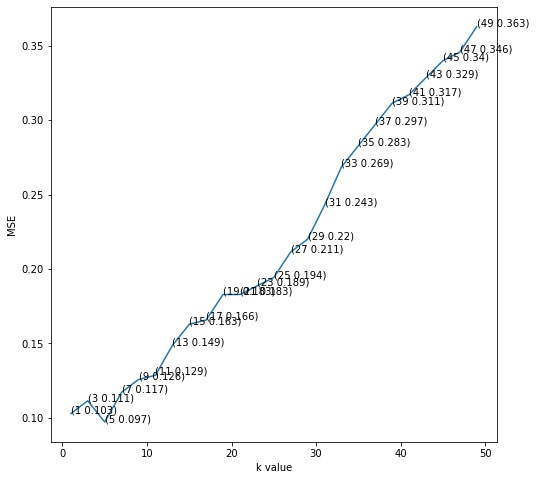

In [54]:
######## kfold cross validation

neighbors = list(range(1,50))

neighbors = list(filter(lambda x: x %2 != 0 , neighbors))

cv = []

for i in neighbors:
    model  = KNeighborsClassifier( n_neighbors = i)
    accuracy = model_selection.cross_val_score(model,x_train,y_train,cv = 10 ,scoring = 'accuracy' )
    cv.append(accuracy.mean())   
    
MSE = [1-x for x in cv]

optimal_k = neighbors[MSE.index(min(MSE))]

print("optimum value of k is %d"%optimal_k)
plt.figure( figsize = (8,8))
plt.plot( neighbors , MSE )

for xy in zip(neighbors,np.round(MSE,3)):
    plt.annotate("(%s %s)"%xy , xy = xy, textcoords = "data")
    
plt.xlabel("k value")
plt.ylabel("MSE")
plt.show()

In [63]:
model = KNeighborsClassifier( n_neighbors =5)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred,normalize = "True")*float(100))


88.0
